# Hamiltonian Monte Carlo Experiments
This notebook contains the code to apply HMC sampling on the implementation of neural networks from the ProbabilisticLayers notebook. This code is mostly the same as the example from AdvancedHMC.jl page (https://github.com/TuringLang/AdvancedHMC.jl). The custom neural network implementation is used, rather than Flux to make comparisons better.

! NOTE ! If running this notebook, ensure that there is a subfolder called images in the same location as this notebook. Otherwise there will be failures.

! NOTE ! Rerunning the notebook may have different results.

! NOTE ! This notebook usually takes ~2 minutes to run.

In [1]:
using Random
using Plots
include("./BayesHMC.jl")
using .BayesHMC
include("./Datasets.jl")
using .Datasets

In [2]:
begin
    Random.seed!(0)
    num_weights, predictions, logprob = make_neural_network_functions([1, 20, 20, 1], 0.1, 0.01, rbf)
    log_posterior(weights) = logprob(weights, inputs, targets)
    inputs, targets = build_dataset_1()
    samples, _ = run_hmc_sampler(20, 10, num_weights, log_posterior)
    nothing
end

┌ Info: Finished 10 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.002146725744455158),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -40), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.00215)
│   h.metric = DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:189
┌ Info: Finished 20 sampling steps for 1 chains in 5.9702207 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.00215), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 0.300265024

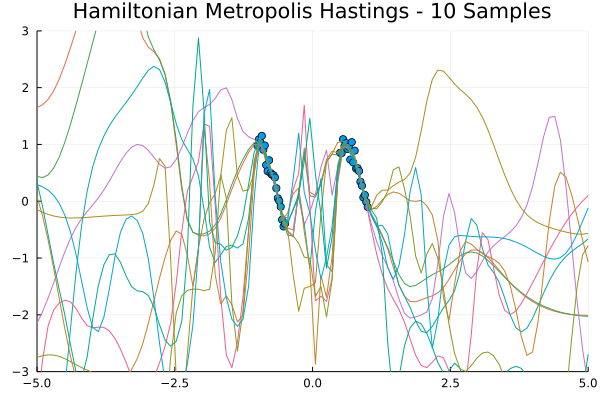

In [3]:
begin
    plot_in = collect(LinRange(-5, 5, 100))
    plot_in = reshape(plot_in, size(plot_in)..., 1)
    epochs = length(samples)
    scatter(inputs, targets, xlim=(-5, 5), ylim=(-3, 3), title="Hamiltonian Metropolis Hastings - 10 Samples", label="")
    for i in range(1, epochs)
        plot!(plot_in, predictions(samples[i], plot_in), label="")
    end
    savefig("images/hmc_dataset_1.png")
    current()
end

In [4]:
begin
    Random.seed!(0)
    num_weights, predictions, logprob = make_neural_network_functions([1, 20, 20, 1], 0.1, 0.01, rbf)
    log_posterior(weights) = logprob(weights, inputs, targets)
    inputs, targets = build_dataset_2()
    samples, _ = run_hmc_sampler(20, 10, num_weights, log_posterior)
    nothing
end

┌ Info: Finished 10 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.0022642722703585015),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -40), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.00226)
│   h.metric = DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:189
┌ Info: Finished 20 sampling steps for 1 chains in 3.6103133 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.00226), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 1.80011876

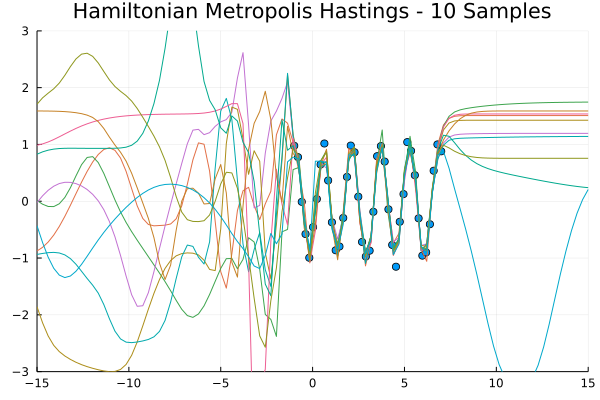

In [5]:
begin
    plot_in = collect(LinRange(-15, 15, 100))
    plot_in = reshape(plot_in, size(plot_in)..., 1)
    epochs = length(samples)
    scatter(inputs, targets, xlim=(-15, 15), ylim=(-3, 3), title="Hamiltonian Metropolis Hastings - 10 Samples", label="")
    for i in range(1, epochs)
        plot!(plot_in, predictions(samples[i], plot_in), label="")
    end
    savefig("images/hmc_dataset_2.png")
    current()
end

In [6]:
begin
    Random.seed!(0)
    num_weights, predictions, logprob = make_neural_network_functions([1, 20, 20, 1], 0.1, 0.01, rbf)
    log_posterior(weights) = logprob(weights, inputs, targets)
    inputs, targets = build_dataset_3()
    samples, _ = run_hmc_sampler(20, 10, num_weights, log_posterior)
    nothing
end

┌ Info: Finished 10 adapation steps
│   adaptor = StanHMCAdaptor(
    pc=WelfordVar,
    ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.8, state.ϵ=0.0022737153058173653),
    init_buffer=75, term_buffer=50, window_size=25,
    state=window(76, -40), window_splits()
)
│   κ.τ.integrator = Leapfrog(ϵ=0.00227)
│   h.metric = DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])
└ @ AdvancedHMC C:\Users\andre\.julia\packages\AdvancedHMC\51xgc\src\sampler.jl:189
┌ Info: Finished 20 sampling steps for 1 chains in 6.1102419 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   κ = AdvancedHMC.HMCKernel{AdvancedHMC.FullMomentumRefreshment, AdvancedHMC.Trajectory{AdvancedHMC.MultinomialTS, AdvancedHMC.Leapfrog{Float64}, AdvancedHMC.GeneralisedNoUTurn{Float64}}}(AdvancedHMC.FullMomentumRefreshment(), Trajectory{AdvancedHMC.MultinomialTS}(integrator=Leapfrog(ϵ=0.00227), tc=AdvancedHMC.GeneralisedNoUTurn{Float64}(10, 1000.0)))
│   EBFMI_est = 0.29739630

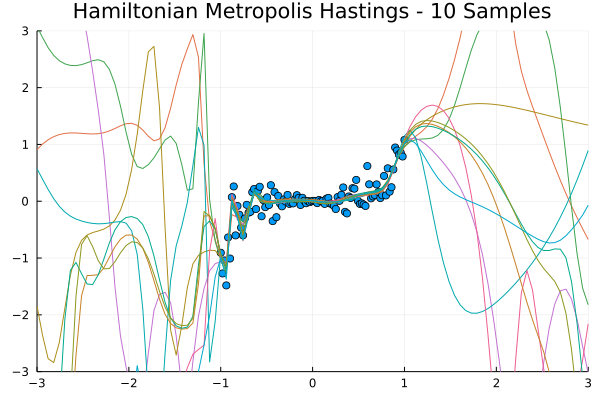

In [7]:
begin
    plot_in = collect(LinRange(-3, 3, 100))
    plot_in = reshape(plot_in, size(plot_in)..., 1)
    epochs = length(samples)
    scatter(inputs, targets, xlim=(-3, 3), ylim=(-3, 3), title="Hamiltonian Metropolis Hastings - 10 Samples", label="")
    for i in range(1, epochs)
        plot!(plot_in, predictions(samples[i], plot_in), label="")
    end
    savefig("images/hmc_dataset_3.png")
    current()
end